In [50]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px

import rfpimp

In [51]:
df = pd.read_csv("../data/Clean/bank_encoded.csv")

In [52]:
df.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,1,0,0,0,1,0


Remove target

In [53]:
X = df.drop("y", axis=1)
y = df.y

Test train split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LogisticRegression

In [55]:
lr = LogisticRegression()
scores = cross_validate(lr, X, y, cv=10, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [56]:
scores

{'fit_time': array([1.93500757, 1.98000574, 2.05299759, 1.96999693, 2.02501154,
        1.86900306, 1.83299828, 1.77001071, 0.87797713, 0.85998988]),
 'score_time': array([0.03300118, 0.03000379, 0.02399707, 0.03000617, 0.01998782,
        0.03600454, 0.03699374, 0.03400302, 0.0160017 , 0.01600146]),
 'test_accuracy': array([0.88265306, 0.88287829, 0.88287829, 0.88287829, 0.88262312,
        0.88747129, 0.90303649, 0.90278132, 0.93161521, 0.31538658]),
 'test_average_precision': array([0.14128544, 0.06142062, 0.18169964, 0.99945123, 0.44200846,
        0.995034  , 0.9629517 , 0.72540399, 0.92835441, 0.11690562]),
 'test_recall': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.04130435, 0.17391304, 0.18913043, 0.47173913, 0.85      ]),
 'test_f1': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.07933194, 0.2962963 , 0.31351351, 0.61823362, 0.22568543]),
 'test_roc_auc': array([0.53401074, 0.0077871 , 0.2171471 , 0.99992759, 0.737

In [57]:
scores["test_accuracy"].mean()

0.8354201925730742

Random Forest

In [58]:
rfc = RandomForestClassifier()
rfc_scores = cross_validate(rfc, X, y.values.ravel(), cv=10, scoring=('accuracy', 'average_precision', 'recall','f1'))

In [59]:
rfc_scores

{'fit_time': array([3.02499747, 3.06400681, 3.03800631, 3.24499941, 3.20999503,
        3.24700046, 3.17900324, 3.09299493, 3.05500031, 3.1320014 ]),
 'score_time': array([0.07500219, 0.13100028, 0.102     , 0.13799953, 0.14900208,
        0.11799908, 0.09999633, 0.08900571, 0.11300063, 0.07500386]),
 'test_accuracy': array([0.88265306, 0.84256188, 0.19009952, 0.79382496, 0.67695841,
        0.28272518, 0.17657566, 0.19188569, 0.12936974, 0.180148  ]),
 'test_average_precision': array([0.16939111, 0.0980927 , 0.09014375, 0.07684651, 0.08181543,
        0.07330871, 0.06798744, 0.06666745, 0.06398907, 0.09602854]),
 'test_recall': array([0.        , 0.        , 0.        , 0.0087146 , 0.0173913 ,
        0.        , 0.        , 0.        , 0.00434783, 1.        ]),
 'test_f1': array([0.        , 0.        , 0.        , 0.00980392, 0.0124805 ,
        0.        , 0.        , 0.        , 0.00117096, 0.2225986 ])}

In [60]:
rfc_scores["test_accuracy"].mean()

0.4346802078831023

Huge difference between the models so i would choose LogisticRegression model to predict future values.

Feature Importance

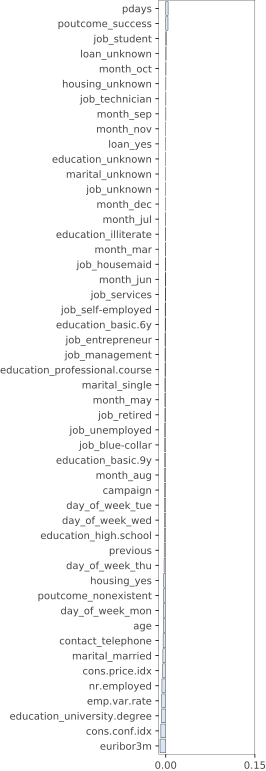

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train.values.ravel())
importance = rfpimp.importances(rfc, X_test, y_test)
rfpimp.plot_importances(importance)

Save model

In [67]:
pickle.dump(lr, open("../Models/LogisticRegression.model","wb"))